## Introduction

This notebook uses data science methodology to determine whether it rains more in Seattle, WA than in St. Louis, MO.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/lbomine/Seattle-Weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [ ]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/lbomine/Seattle-Weather/main/seattle_rain.csv')

Load the St. Louis data set

In [ ]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/lbomine/Seattle-Weather/main/stl_rain.csv')

## Explore the contents of the data sets

Start by looking at the head of each data frame. This will let us see the names of the columns and a few example values for each column.

In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


We can consult the [data documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) to see the definition of each variable.

Use the `info` method to check the data types, size of the data frame, and numbers of missing values.

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


Examine the contents of the St. Louis data set.

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


From the head of the data frame, the data sets appear to have similar content. However, the columns are not entirely the same.

In [ ]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [ ]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

We are not concerned about the differences because we only need the `DATE` and `PRCP` columns from each data set.

We can also see that the St. Louis data set contains data from 2017, which we do not need.

Use the `info` method to check the data types, size of the DataFrame, and numbers of missing values.

In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


We see the same data types as for the Seattle data set. 

One striking observation is that the St. Louis data set contains many more observations than the Seattle data set. We already noted that the St. Louis data set contains values from 2017, but that would not account for the size of the data set.

**Why might the St. Louis data set be larger?**

In [ ]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [ ]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [ ]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

St. Louis includes data from more stations, whereas Seattle has only one.

## Convert data types, if necessary

### Convert `DATE` to datetime 

It is important to convert dates to `datetime` types (or `int`) before plotting the data, because when dates are strings or objects, a plot will show successive values next to each other without recognizing possible gaps in dates.

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


Convert the St. Louis `DATE` variable to datetime type.

In [ ]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  54574 non-null  object        
 1   NAME     54574 non-null  object        
 2   DATE     54574 non-null  datetime64[ns]
 3   DAPR     1166 non-null   float64       
 4   MDPR     1163 non-null   float64       
 5   PRCP     53143 non-null  float64       
 6   SNOW     33167 non-null  float64       
 7   SNWD     12835 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.3+ MB


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

**What can we do to check whether the data are suitable?**

Plot the daily precipitation data for Seattle.

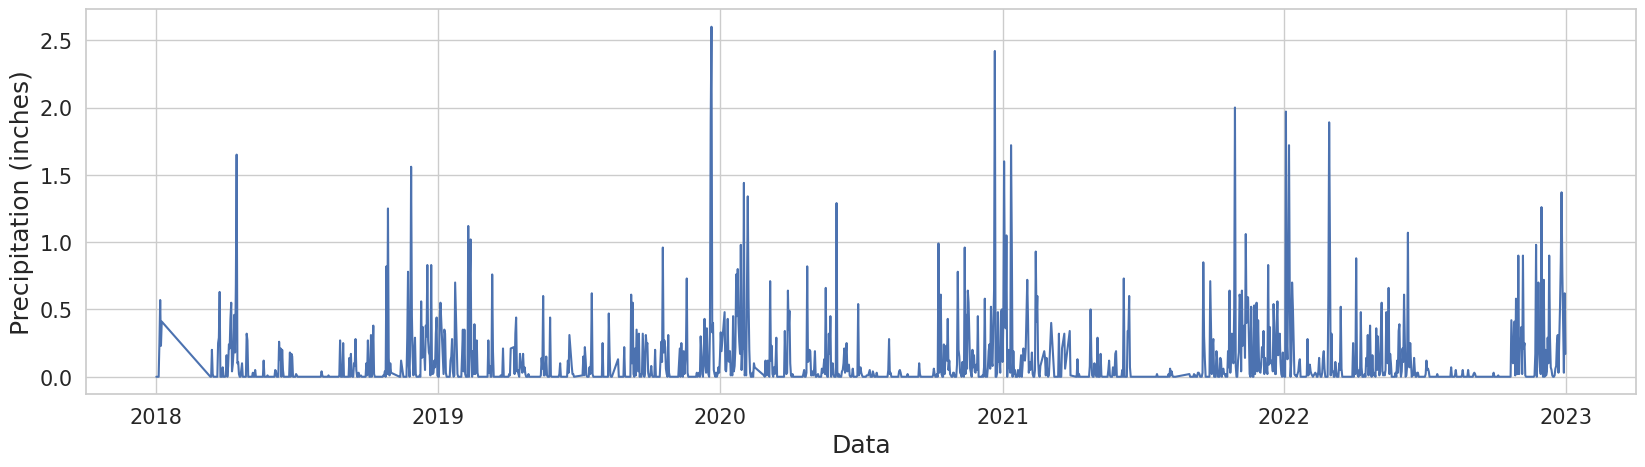

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Data', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

From this plot we can see that there is missing data at the beginning of 2018.

In [ ]:
df_seattle.head(30)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-12,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-13,NaN,NaN,0.00,NaN,NaN,NaN,NaN


Seattle's data is missing dates from 2018-01-09 to 2018-03-11.

Plot the daily precipitation data for St. Louis.

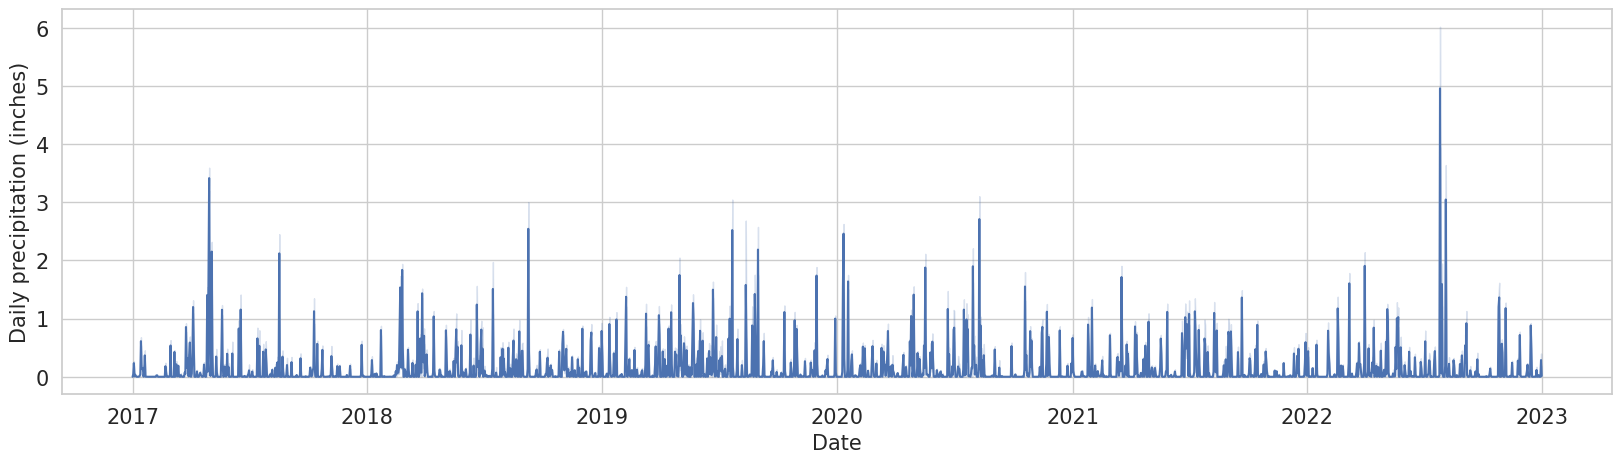

In [ ]:
plt.figure(figsize = (20,5))

sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily precipitation (inches)', fontsize = 15)
plt.tick_params(labelsize=15);

St. Louis has data from 2017 that is unecessary for this analysis.

## Select relevant subsets of the data

We saw that the St. Louis data set contains data prior to 2018. Limit the St. Louis data to 2018 and beyond.

Data before we limit the dates for St. Louis dataframe:

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [ ]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

Data after we limit the dates for St. Louis dataframe:

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


We also saw that the St. Louis data set was much larger than the Seattle data set. How many stations are present in the St. Louis data set?

In [ ]:
df_stlouis['STATION'].value_counts()

USW00003960    1826
USW00013994    1826
USC00237398    1824
USC00237397    1824
US1MOSLC007    1819
USC00237452    1793
US1ILMD0010    1792
US1MOSL0024    1768
US1MOJF0018    1756
US1MOSL0027    1728
US1MOSL0074    1674
US1ILMD0012    1667
US1MOSL0004    1612
US1MOSL0049    1604
US1MOSL0018    1598
US1MOSL0055    1490
US1MOSL0050    1485
US1MOSS0027    1422
US1MOFSA189    1420
US1MOSL0077    1339
US1MOSL0020    1287
US1MOSL0039    1219
US1MOSL0067    1204
US1MOJF0025    1124
US1ILSC0009    1034
US1MOSL0081     914
US1MOSL0063     804
US1MOSL0083     646
US1MOSL0045     628
US1MOSL0062     621
US1MOSL0070     602
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1ILSC0018     237
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1ILMO0006     162
Name: STATION, dtype: int64

The St. Louis data set has values for many weather stations, while the Seattle data set has only one weather station. 

We will focus on the data from the airport in St. Louis.

In [ ]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [ ]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

Data after we choose one station for St. Louis dataframe:

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.0,0.0,0.0
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.0,0.0,0.0
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.0,0.0,0.0
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.0,0.2,0.0
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.0,0.0,0.0


## Identify and deal with missing values

Data can be missing in multiple manners:
1. Values are `NaN` in the data frame

In [ ]:
df_seattle.head(2)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN


2.  Values are not included in the data set.

### Count the non-null or null values

Use the `.info()` method to determine the number of non-null values in each column. 

Start with the St. Louis data set.

In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


We can also use the `.isna()` function to check for null values in the data set.

In [ ]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

The St. Louis data set does not have any `NaN` values of `DATE` or `PRCP`. Are any dates omitted?

**How many data points should we have from 2018 to 2022?**

Over 5 years there should be 

$$5 \times 365 + 1 = 1826$$

days. 

The St. Louis data set is not missing any dates or precipitation values. Check Seattle:

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


The Seattle data set is missing some dates and precipitation values. We could see this in the time series plot.

We can use the library `missingno` to visualize where values are missing.

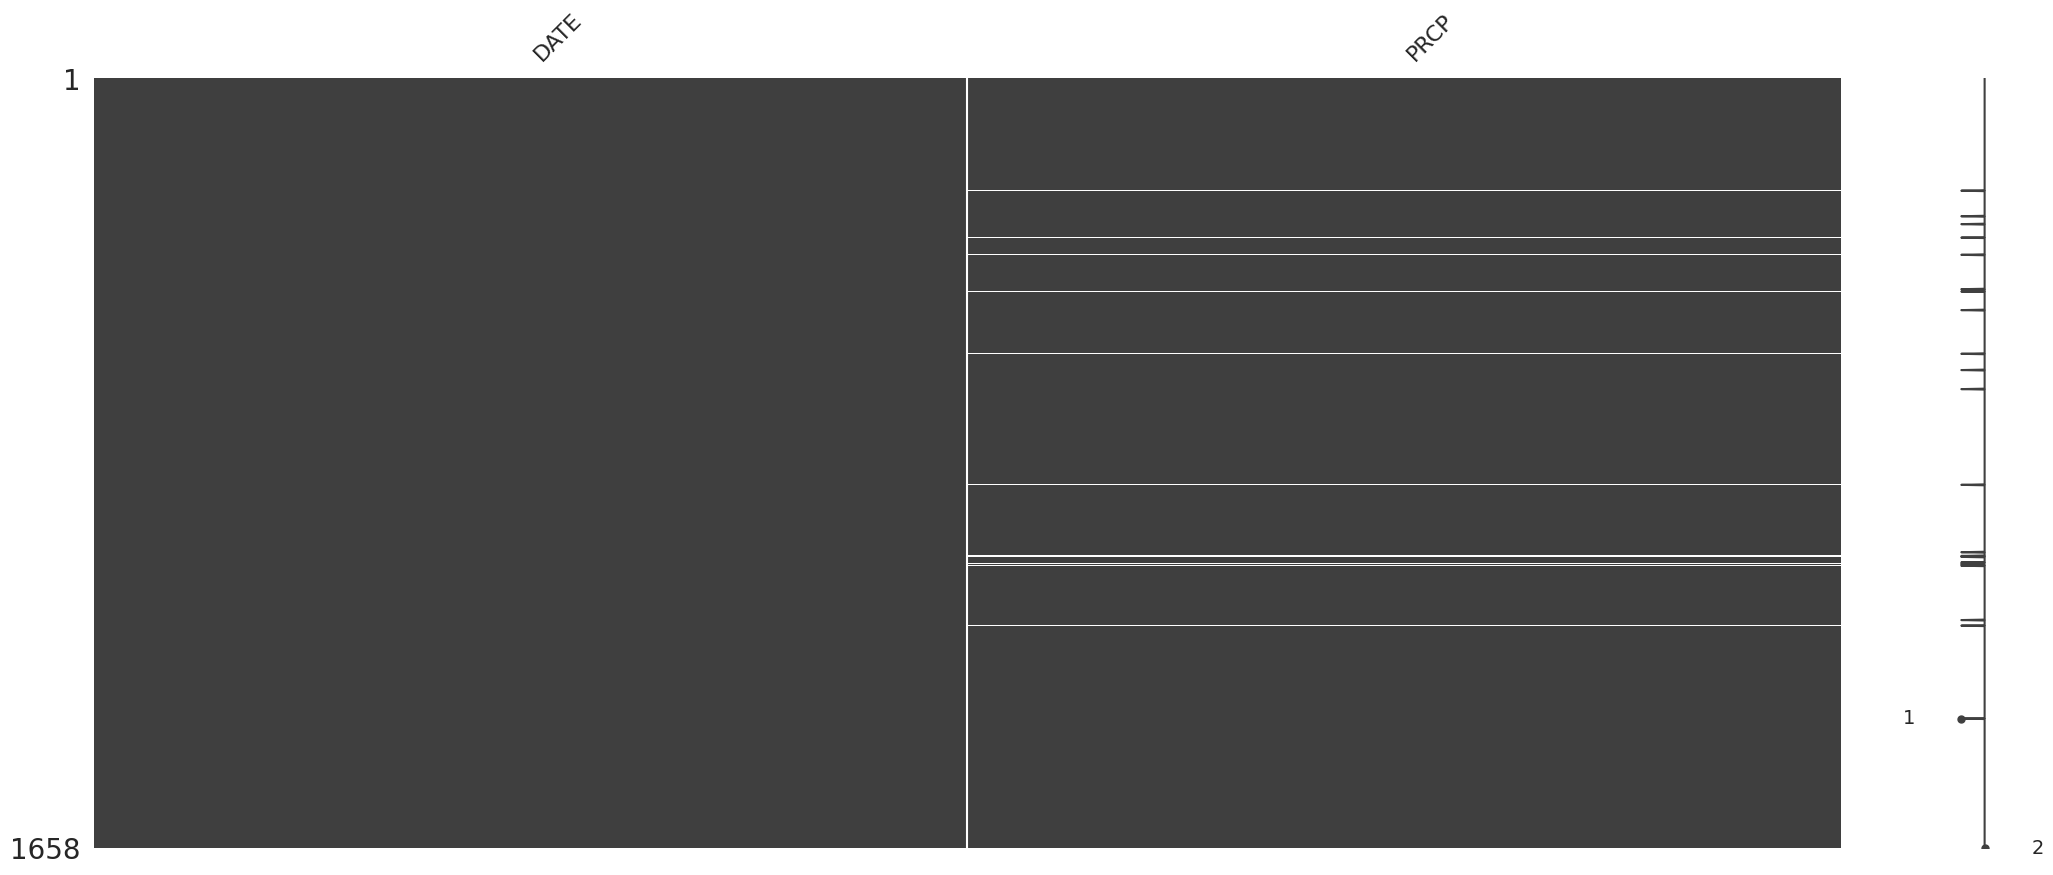

In [ ]:
msno.matrix(df_seattle[['DATE','PRCP']]);

This is helpful, but we should note that this does not indicate where there are dates that are not present in the data set. We will return to this issue after joining the data sets because this will show the dates that are missing from the Seattle data set.

## Join data frames keeping `DATE` and `PRCP` columns

St. Louis has data for all dates, so do a left join with St. Louis as the left data set.

In [ ]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

The resulting St. Louis data frame:

In [ ]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


Each DataFrame had a column named `PRCP`, so the default is to add suffixes _x and _y to differentiate the columns. Normally, I would rename the columns at this point to something more informative. However, I know that I want to convert the DataFrame to a tidy format and I will modify the names later.

## Create a tidy data frame with columns for city and precipitation

In [ ]:
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.31,0.62


Fixing the dataframe to move the columns with the same name `PRCP` to rows under a new column named `CITY`.

In [ ]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

[pd.melt documentation](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

Data set after moving data and adding `CITY` column:

In [ ]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


### Rename columns or values to follow best practices

Rename the city values 'STL' and 'SEA'

In [ ]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [ ]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

The data set after renaming the city values:


In [ ]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [ ]:
df.tail()

,DATE,CITY,PRCP
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


Rename the columns to be lowercase and more easily understood using `df.rename()`

In [ ]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

[rename documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

The data set after renaming the columns:

In [ ]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


## Deal with missing values

First let's find where there are missing values again.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


Precipitation has missing values. The data and city columns have almost 200 more values than precipitation.


<Axes: >

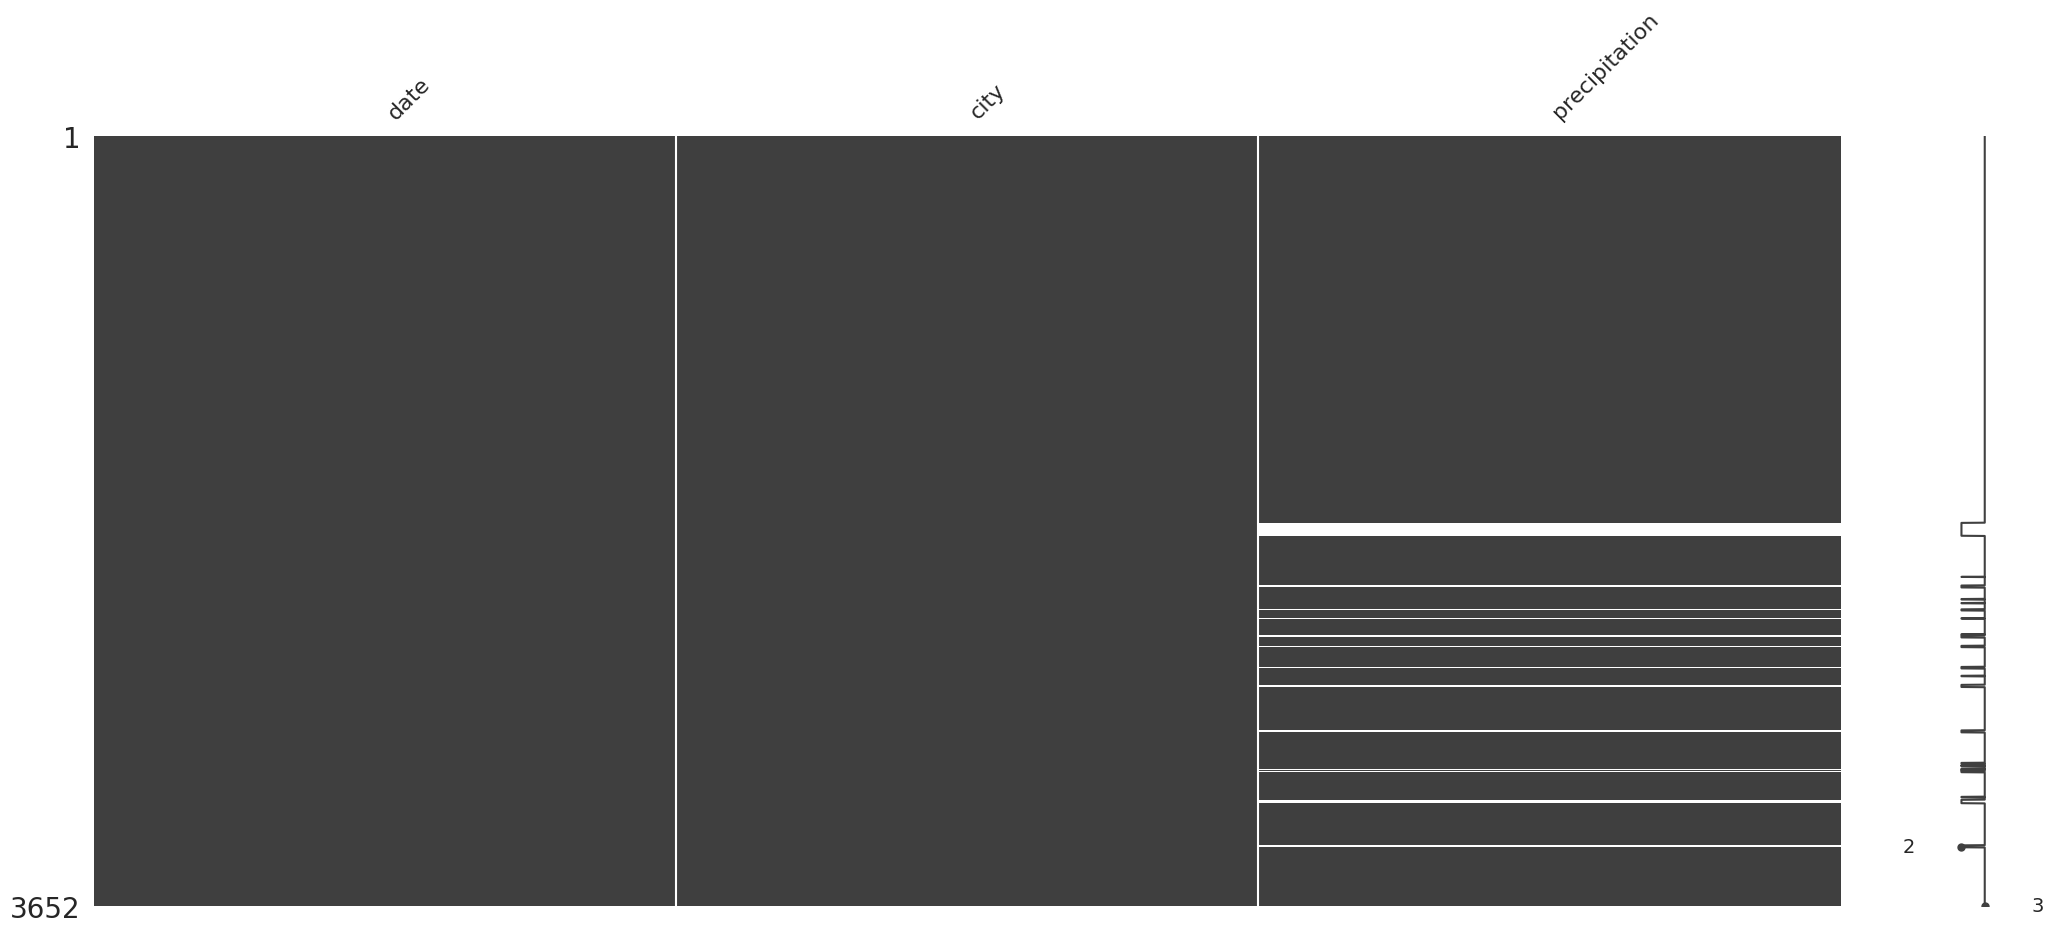

In [ ]:
msno.matrix(df)

When we joined the DataFrames using a left join in the St. Louis data set, which is not missing any days, the missing days were created for the Seattle data set. We can see this block of missing values at the beginning of the second half of the precipitation column.

### Impute missing values

We will replace missing values with the mean across years of values on that day. 


**Design an algorithm for replacing missing values with the mean across years of values on that day.**

1. Iterate through the data and check for any missing values.
2. Get index of each row where value is missing.
3. Compute the mean  precipitation for each day in Seattle, averaged across the years.

Define a column that labels each day by the day of the year: 1, 2, ..., 365.

In [ ]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

The data set after adding `day_of_year` column:

In [ ]:
df.head(30)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


Where are observations missing? 

In [ ]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


Get the index of each row where precipitation is missing.

In [ ]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [ ]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

Compute the mean precipitation for each day in Seattle, averaged across years.

In [ ]:
df['day_of_year'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

There are 366 days because of leap year.

In [ ]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [ ]:
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


For each missing value, replace it with the mean daily precipitation.

In [ ]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Check that there are no missing values.

In [ ]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

In [ ]:
index=indices[0]

In [ ]:
df.loc[index,'day_of_year']

9

In [ ]:
mean_day_precipitation.loc[df.loc[index,'day_of_year']]

precipitation    0.1475
Name: 9, dtype: float64

Check that there are no missing values left in the data set.

In [ ]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3652 non-null   float64       
 3   day_of_year    3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


Now since there are no missing values we can start to derive variables to help with analysis.

## Create relevant derived variables as new columns

I would like to focus on month by month data so I will create a new column 'month'.

In [ ]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [ ]:
df

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.00,1,1
1,2018-01-02,STL,0.00,2,1
2,2018-01-03,STL,0.00,3,1
3,2018-01-04,STL,0.00,4,1
4,2018-01-05,STL,0.00,5,1
...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12
3648,2022-12-28,SEA,0.40,362,12
3649,2022-12-29,SEA,0.03,363,12
3650,2022-12-30,SEA,0.62,364,12


## Plots

### Yearly Precipitation by City

Create a plot that includes every single date where it rained in each city.

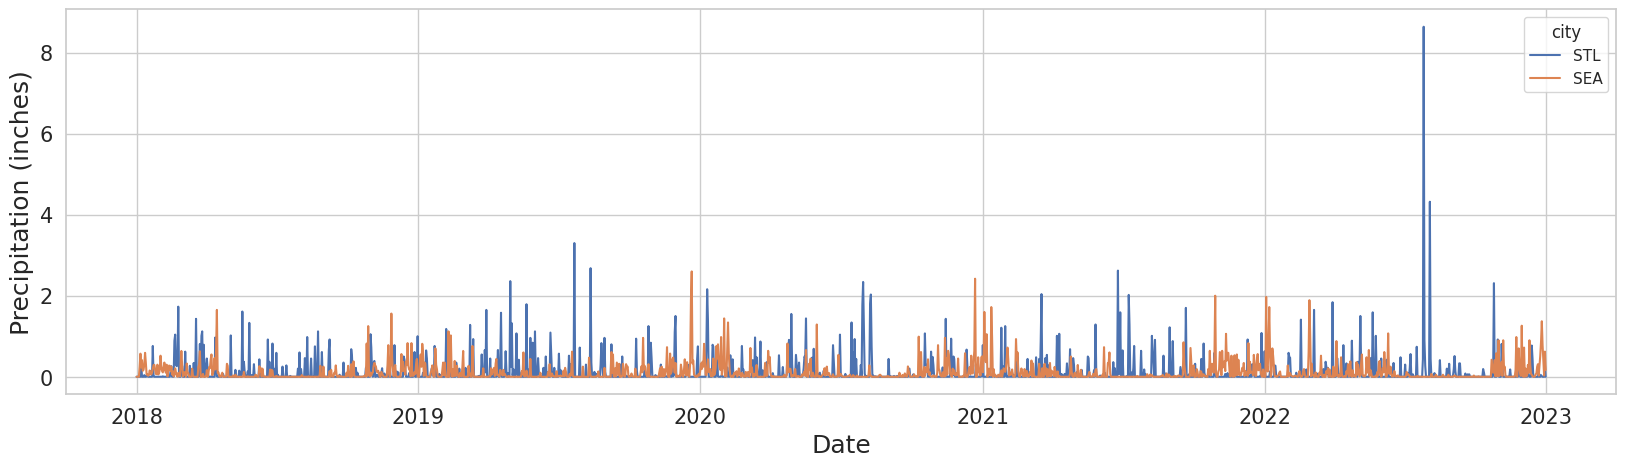

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

At first glance we see that St. Louis' precipitation spiked in 2022. This skews the overall data set. I want to focus more on how that affects the data set.

### Monthly Mean Precipitation by City

Create a plot of the mean precipitation for each month.

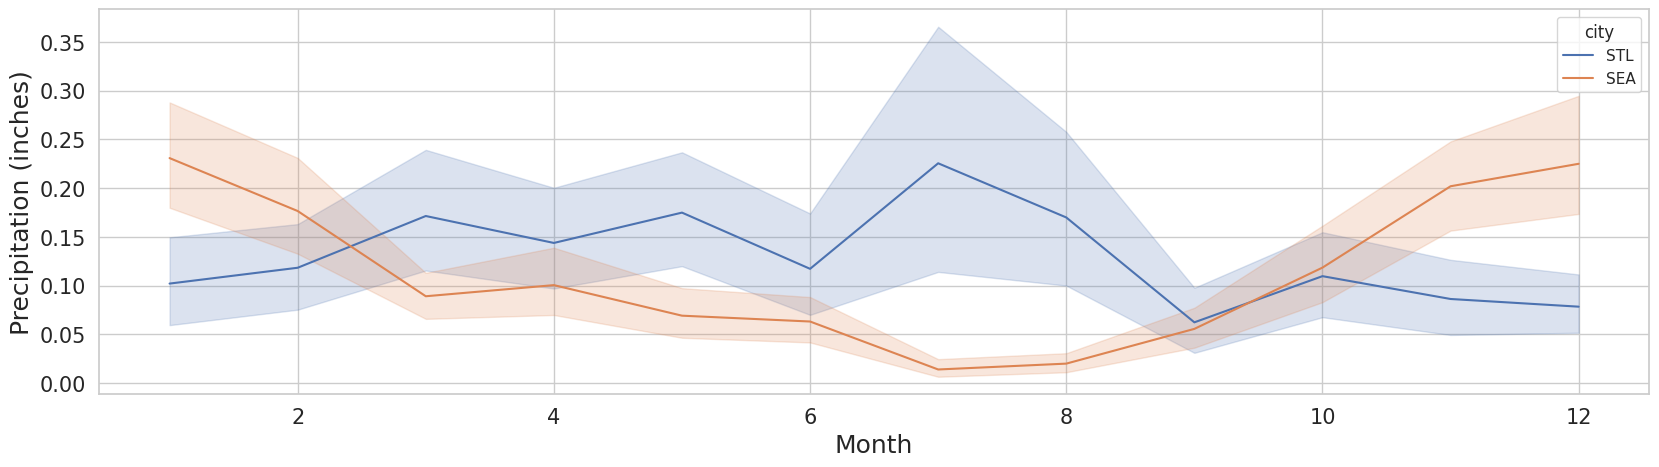

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

The plot shows the monthly mean precipitation and the shading shows the range between the minimum and maximum value for each month. The line for St. Louis has thicker shading, thus the precipitation has a wider range of values. Seattle has little precipitation in months 6-8 and a smaller range of values in comparison to St. Louis.

Compare the mean precipitation by city.

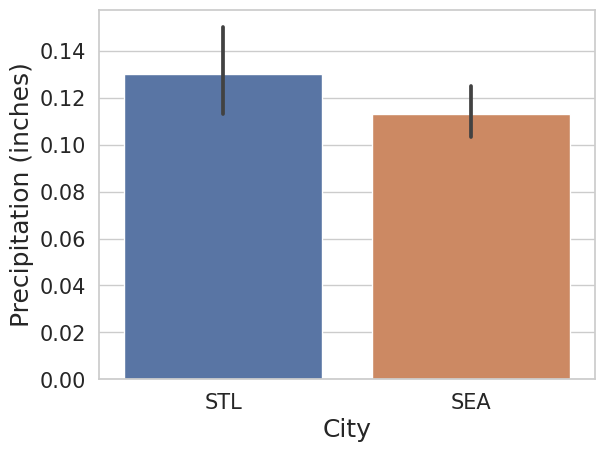

In [ ]:
sns.barplot(data=df, x='city', y='precipitation')

plt.xlabel('City', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

From comparing the mean we see that on average, St. Louis has more rain than Seattle.

Creating another plot to emphasize the difference between St. Louis and Seattle's mean precipitation by month.

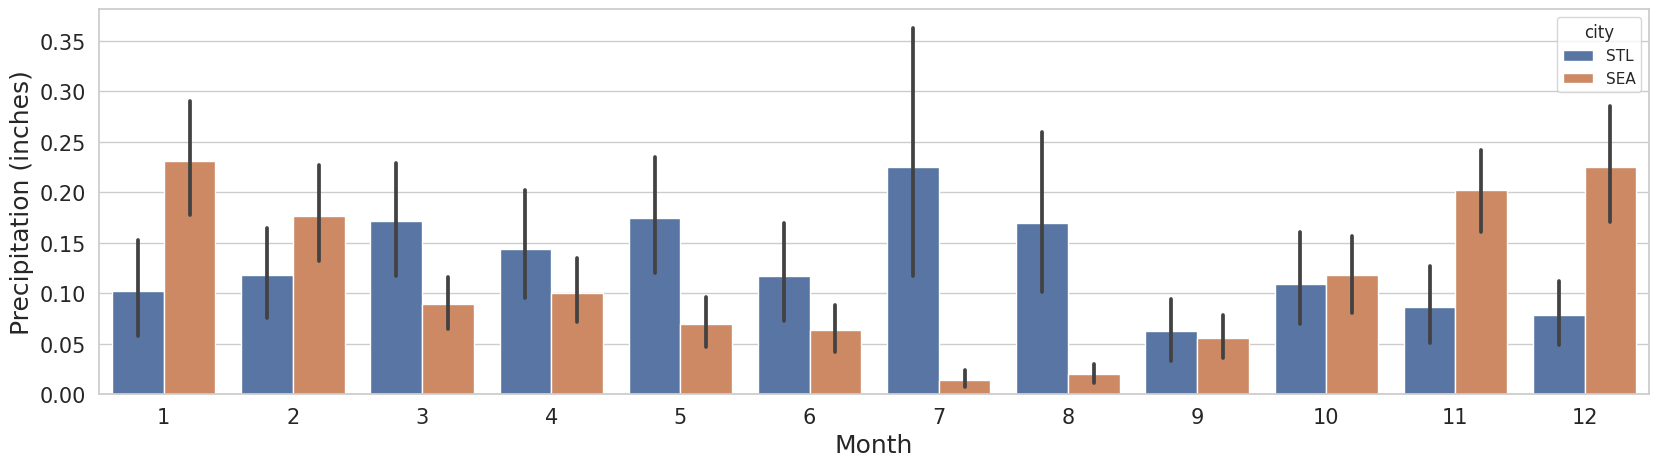

In [ ]:
plt.figure(figsize=(20,5))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

Faceting the graph to look at each city data side by side. Including a line to show where the overall mean precipitation is.

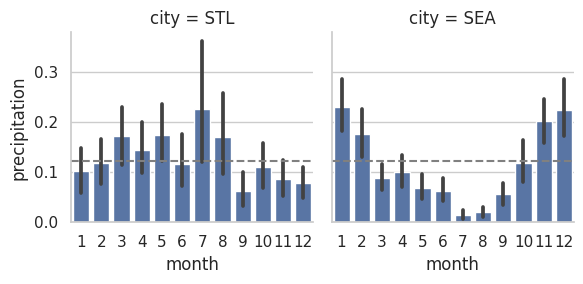

In [ ]:
g = sns.FacetGrid(df, col='city', margin_titles=True)
g.map_dataframe(sns.barplot, x='month', y='precipitation')
g.refline(y=df['precipitation'].mean())

In the St. Louis plot, month 7 has a large error bar showing that there is an outlier, as found in earlier plots. This plot also helps visualize that Seattle rains less in months 7 and 8 compared to St. Louis. On average, St. Louis has more rain than Seattle. The bars corresponding to each month for St. Louis are more often above the line (mean) than Seattle. However, the mean precipitation may not be accurate due to the outlier.

### Total Days Rained by City

Count the amount of days it rained in each city.

In [ ]:
df.value_counts(['city', df['precipitation'] > 0])

city  precipitation
STL   False            1228
SEA   True              999
      False             827
STL   True              598
dtype: int64

Seattle had 999 days of rain whereas St. Louis only had 598 days of rain.

This is strange. From earlier plots, St. Louis has an average of more precipitation than Seattle. This leads me to think that St. Louis has more inches of precipitation but Seattle has more days of rain.

Creating a copy of the existing data frame to a new one called `days_rained_df` and adding a new column `rained`. This will hold true/false values that say whether it rained or not that day.

In [ ]:
days_rained_df = df.copy()
days_rained_df['rained'] = df['precipitation'] > 0

Updated data set after adding the `rained` column:

In [ ]:
days_rained_df.head()

,date,city,precipitation,day_of_year,month,rained
0,2018-01-01,STL,0.0,1,1,False
1,2018-01-02,STL,0.0,2,1,False
2,2018-01-03,STL,0.0,3,1,False
3,2018-01-04,STL,0.0,4,1,False
4,2018-01-05,STL,0.0,5,1,False


In [ ]:
days_rained_df.tail()

,date,city,precipitation,day_of_year,month,rained
3647,2022-12-27,SEA,0.78,361,12,True
3648,2022-12-28,SEA,0.40,362,12,True
3649,2022-12-29,SEA,0.03,363,12,True
3650,2022-12-30,SEA,0.62,364,12,True
3651,2022-12-31,SEA,0.17,365,12,True


Plot the new data set to compare the total days it rained in each city.

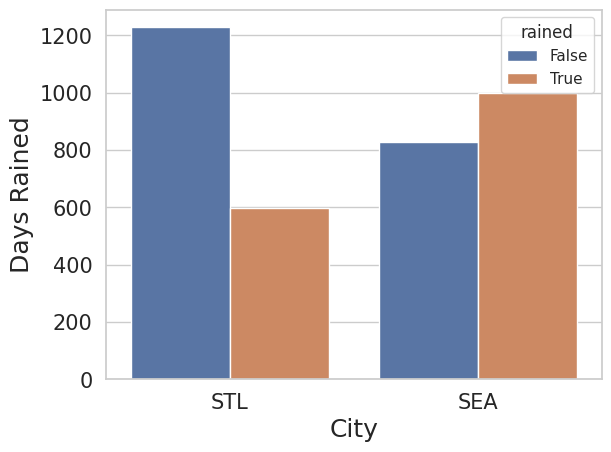

In [ ]:
sns.countplot(data=days_rained_df, x='city', hue='rained')

plt.xlabel('City', fontsize=18)
plt.ylabel('Days Rained', fontsize=18)

plt.tick_params(labelsize=15);

The days it did not rain in St. Louis is much greater than the days it did rain in St. Louis. Seattle rained on more days but, the variance between rain and no rain is smaller than St. Louis. 

This implies that St. Louis has more precipitation on those days where it rains.

### Monthly Max Precipitation by City

Creating a new dataframe to hold the max precipitation for each month and city.

In [ ]:
max_prcp_df = df.groupby(['month','city']).max('precipitation')

In [ ]:
max_prcp_df.head()

precipitation  day_of_year
month city                            
1     SEA            1.97           31
      STL            2.16           31
2     SEA            1.89           60
      STL            1.73           60
3     SEA            1.03           91

Plot the `max_prcp_df` data set to compare the max precipitation for each city.

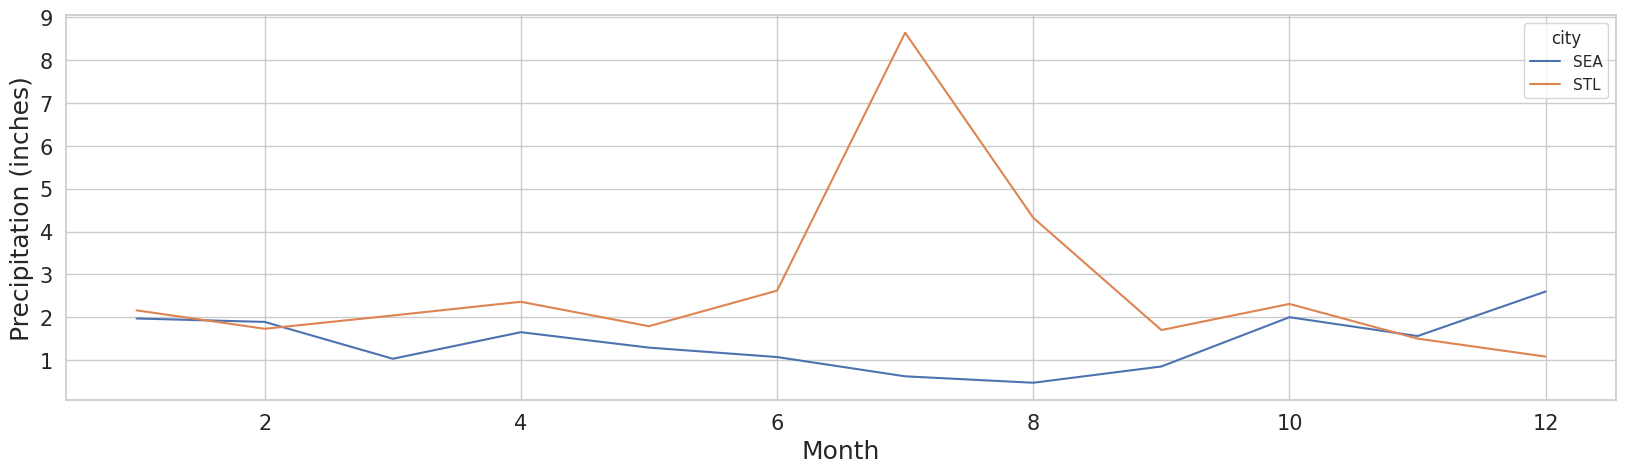

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=max_prcp_df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

Again we can see that St. Louis has an outlier in month 7 where it rained a lot. Overall, St. Louis has the larger max precipitation value for each month.

### Monthly Median Precipitation by City

Creating a plot to show the median precipitation.

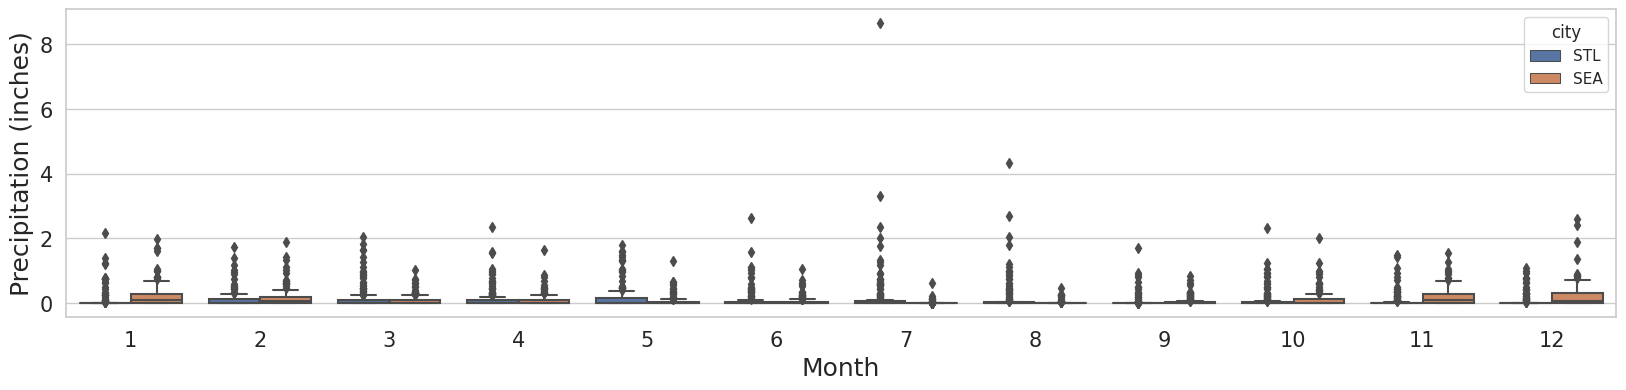

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

This boxplot is hard to understand because we have an outlier in month 7. To counter this, we limit the y-axis to the range we want to focus on.

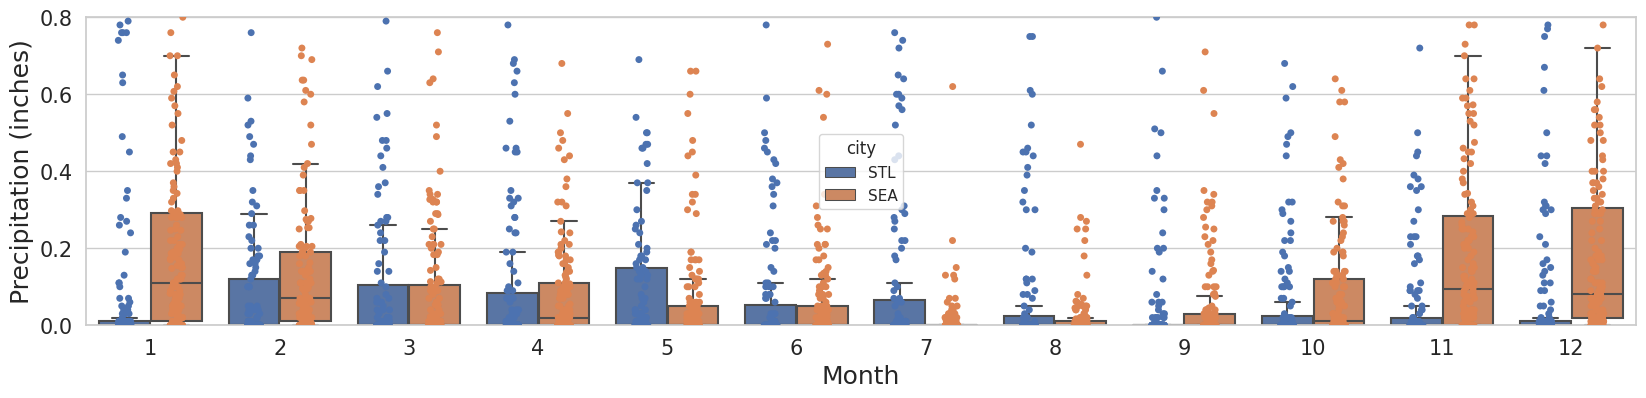

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city', fliersize=0)
sns.stripplot(data = df, x = 'month', y = 'precipitation', hue='city', dodge=True, legend=False)

plt.ylim(0,.8)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);


The box plot displays the distribution of the monthly precipitation in quartiles. The points represent the precipitation values.

We can also see with the box plots that Seattle has more rain based on the seasons. It tends to rain more in fall and winter months and rain less in spring and summer months.

## Summary


St. Louis has more rain but Seattle has more days of rain.

## Export the clean .csv file

In [ ]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>